#### KNN
- 유유상종 : 끼리끼리 모인다
- K개의 가장 가까이 존재하는 데이터를 기준으로 결과를 정하는 알고리즘
- 데이터와 데이터의 거리를 도출해서 거리 순으로 정렬
- K개 만큼 가까이 있는 데이터 도출
    => 분류 : 다수결 원칙으로 많은 종류의 데이터 결론 도출
    => 회귀 : 데이터의 평균값으로 결과를 도출 
- 특징
 : 데이터의 규칙/패턴을 나타내는 수식이 없음
 : 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 => 게으른 학습

#### Scikit-learn 패키지 기계학습
- 기계학습 방법
    (1) 학습 모델 인스턴스 생성
    (2) 학습 메서드 => fit(2D, 1D)
    (3) 테스트 메서드 => score(2D, 1D)
    (4) 활용 메서드 => predict( 2D ) ----> 결과

## 목표 : 생선 품종 분류 모델
    - 데이터 : 2가지 품종의 생선 데이터 fish.csv
    - 피 쳐 : Weight, Length
    - 타 겟 : Speci
    - 유 형 : 지도학습 / 분류

### (1) 모듈 로딩 & 데이터 준비 <hr>

In [335]:
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈

In [336]:
data_file = '../data/fish.csv'

In [337]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info() # 수치, 시각화 모두 해서 확인해야

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [338]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(["Bream", "Smelt"]) # Boolean Indexing

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)

In [339]:
## Bream, Smelt 품종명을 수치화
twoFishDF.loc[:,'Species'] = twoFishDF.Species.replace({'Bream':0,  'Smelt': 1}).copy()
# DF일때는 위와 같이 .loc 하지 않으면 슬라이싱이 발생하여 warning 발생
# twoFishDF.Species.dtype
twoFishDF['Species'].dtype # dtype('O')
twoFishDF['Species']= twoFishDF.Species.astype('int64')
twoFishDF['Species'].dtype # dtype('int64')

/var/folders/9y/lpn0hjmn5csct06t4_r5qtjr0000gn/T/ipykernel_36908/269809121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoFishDF['Species']= twoFishDF.Species.astype('int64')


dtype('int64')

### (2) 데이터 전처리<hr>

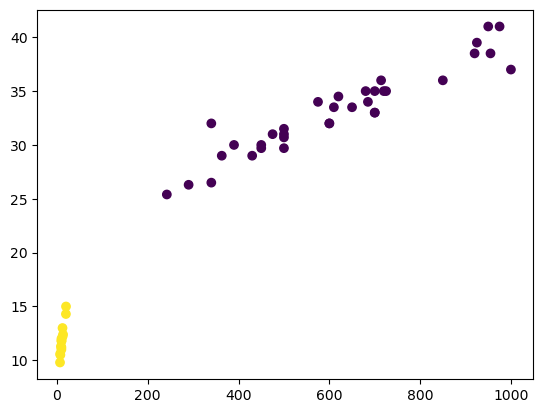

In [340]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인

import matplotlib.pyplot as plt

plt.scatter(x=twoFishDF.Weight, y=twoFishDF.Length, c=twoFishDF.Species)

#### (3) 기계학습을 위한 데이터 준비
- 피쳐/특성 + 타겟/라벨 /클래스
- 학습용 데이터셋   : 75%  
- 테스트용 데이터셋 :  25%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [341]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1)
twoFishDF.shape # frac=0.5 : (24,3) / frac=1 : (49,3)

(49, 3)

In [342]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
trainDF = twoFishDF.iloc[:num+1]

# 테스트 데이터셋 추출
testDF = twoFishDF.iloc[num+1:]

(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비
- 추가 모듈 롤딩

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
featureDF=twoFishDF[twoFishDF.columns[1:]]
targetSR=twoFishDF.Species

print(f'featureDF => {featureDF.shape}\n{featureDF.head(2)}')
print(f'targetSR => {targetSR.shape}\n{targetSR.head(2)}')


featureDF => (49, 2)
    Weight  Length
18   610.0    33.5
35     6.7     9.8
targetSR => (49,)
18    0
35    1
Name: Species, dtype: int64


In [361]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle=True, train:test = 0.75:0.25
## -- [설정] train:test = 0.8:0.2 => test_size= 0.2 이면 나머지 자동 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟 언팩해서 받음
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    test_size=0.2
                                                    # 고정시키려면 random_state=10 같은 방식으로 고정시킬 수 있음
)

In [362]:
print(f'X_train => {X_train.shape}, y_train => {y_train}')
print(X_train.head(2), y_train.head(2), sep='\n')
print(f'\nX_test => {X_test.shape}, y_test => {y_test}')
print(X_test.head(2), y_test.head(2), sep='\n')



X_train => (39, 2), y_train => 32    0
30    0
47    1
20    0
33    0
34    0
5     0
41    1
21    0
38    1
0     0
19    0
15    0
39    1
40    1
46    1
43    1
28    0
17    0
25    0
7     0
13    0
11    0
8     0
3     0
45    1
16    0
48    1
12    0
9     0
37    1
10    0
4     0
18    0
36    1
35    1
1     0
42    1
44    1
Name: Species, dtype: int64
    Weight  Length
32   925.0    39.5
30   920.0    38.5
32    0
30    0
Name: Species, dtype: int64

X_test => (10, 2), y_test => 29    0
2     0
27    0
14    0
26    0
31    0
24    0
23    0
6     0
22    0
Name: Species, dtype: int64
    Weight  Length
29  1000.0    37.0
2    340.0    26.5
29    0
2     0
Name: Species, dtype: int64


In [376]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle=True, train:test = 0.75:0.25
## -- [설정] train:test = 0.8:0.2 => train_size= 0.8 or test_size= 0.2 이면 나머지 자동 설정
## --       분류의 경우 target이 불균형일 경우 비율을 지정하는 매개변수 stratify 매개변수를 타겟으로 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟 언팩해서 받음
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR
                                                    # 고정시키려면 random_state=10 같은 방식으로 고정시킬 수 있음

)

In [377]:
print(f'X_train => {X_train.shape}, y_train => {y_train}')
print(X_train.head(2), y_train.head(2), sep='\n')
print(f'\nX_test => {X_test.shape}, y_test => {y_test}')
print(X_test.head(2), y_test.head(2), sep='\n')

X_train => (39, 2), y_train => 34    0
20    0
2     0
6     0
41    1
11    0
23    0
17    0
28    0
9     0
42    1
25    0
38    1
1     0
8     0
44    1
18    0
48    1
27    0
37    1
47    1
4     0
3     0
21    0
15    0
13    0
16    0
30    0
29    0
31    0
19    0
5     0
43    1
7     0
10    0
46    1
45    1
12    0
39    1
Name: Species, dtype: int64
    Weight  Length
34   950.0    41.0
20   575.0    34.0
34    0
20    0
Name: Species, dtype: int64

X_test => (10, 2), y_test => 26    0
22    0
24    0
35    1
40    1
36    1
0     0
33    0
32    0
14    0
Name: Species, dtype: int64
    Weight  Length
26   720.0    35.0
22   620.0    34.5
26    0
22    0
Name: Species, dtype: int64


In [378]:
### 검증용 데이터셋 준비 - 학습용 데이터셋에서 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, # <= 학습용 데이터셋 넣기
                                              y_train, 
                                              test_size=0.1, 
                                              stratify=y_train
                                              )


#### (4) 학습 진행
- 학습 방법 : 지도학습/분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [379]:
model=KNeighborsClassifier()
model

KNeighborsClassifier()

In [380]:
# 학습 진행 => 학습용 데이터 진행
model.fit(X_train, y_train)

KNeighborsClassifier()

#### (5) 테스트 진행 => 학습에 사용되지 않은 데이터로 진행

In [381]:
model.score(X_val, y_val)

1.0

#### (6) 모델 활용 예측 => 새로운 데이터로 진행

In [382]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [383]:
y_test

26    0
22    0
24    0
35    1
40    1
36    1
0     0
33    0
32    0
14    0
Name: Species, dtype: int64

#### (6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측
=> 학습할 때 전달되는 피쳐형태와 동일한 데이터


In [384]:
## 무게가 160, 길이가 25인 생선의 품종 예측 ------------------------
new_data = pd.DataFrame([[160,25]], columns=twoFishDF.columns[1:])
new_data

,Weight,Length
0,160,25


Text(0, 0.5, 'Length')

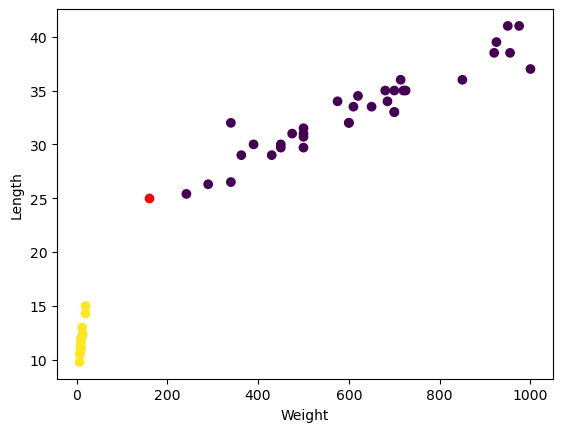

In [385]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel('Weight')
plt.ylabel('Length')

In [386]:
# 생성된 모델로 새로운 데이터 품종 예측
model.predict(new_data)

array([1])

In [390]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data)
index.tolist()[0]

[26, 18, 34, 31, 23]

In [391]:
modelDF = twoFishDF.iloc[index.tolist()[0]]

(0.0, 1000.0)

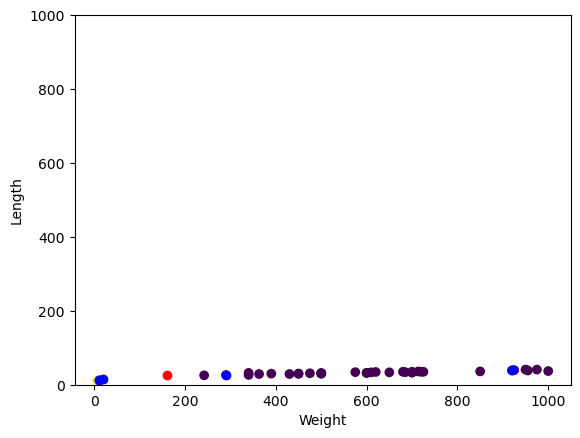

In [394]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')
plt.plot(modelDF.Weight, modelDF.Length, 'bo')

# 학습 데이터 시각화
plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.ylim(0,1000)